In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv('C://Users//User//Desktop//MSc Westminster//Dissertation//DataSets//Heart_Disease_Indicators.csv')
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [2]:
from sklearn.model_selection import train_test_split

target_size = 50000

num_class_0 = int(target_size * df['HeartDiseaseorAttack'].value_counts(normalize=True)[0])
num_class_1 = target_size - num_class_0

df_class_0 = df[df['HeartDiseaseorAttack'] == 0]
df_class_1 = df[df['HeartDiseaseorAttack'] == 1]

df_class_0_sampled = df_class_0.sample(n=num_class_0, random_state=15)
df_class_1_sampled = df_class_1.sample(n=num_class_1, random_state=15)

df_sampled = pd.concat([df_class_0_sampled, df_class_1_sampled])

df_sampled = df_sampled.sample(frac=1, random_state=15).reset_index(drop=True)
df= df_sampled
print(df['HeartDiseaseorAttack'].value_counts(normalize=True))

0    0.90582
1    0.09418
Name: HeartDiseaseorAttack, dtype: float64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HeartDiseaseorAttack  50000 non-null  int64
 1   HighBP                50000 non-null  int64
 2   HighChol              50000 non-null  int64
 3   CholCheck             50000 non-null  int64
 4   BMI                   50000 non-null  int64
 5   Smoker                50000 non-null  int64
 6   Stroke                50000 non-null  int64
 7   Diabetes              50000 non-null  int64
 8   PhysActivity          50000 non-null  int64
 9   Fruits                50000 non-null  int64
 10  Veggies               50000 non-null  int64
 11  HvyAlcoholConsump     50000 non-null  int64
 12  AnyHealthcare         50000 non-null  int64
 13  NoDocbcCost           50000 non-null  int64
 14  GenHlth               50000 non-null  int64
 15  MentHlth              50000 non-null  int64
 16  Phys

In [4]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df.duplicated().sum()

1950

In [6]:
df.drop_duplicates(inplace= True)
df.shape

(48050, 22)

In [7]:
df['Diabetes'].value_counts()

0    40175
2     6968
1      907
Name: Diabetes, dtype: int64

In [8]:
df= df[df['Diabetes'] != 1].copy()
df.loc[df['Diabetes'] == 2, 'Diabetes'] = 1
print(df['Diabetes'].value_counts())

0    40175
1     6968
Name: Diabetes, dtype: int64


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,47143.0,0.096748,0.295618,0.0,0.0,0.0,0.0,1.0
HighBP,47143.0,0.433765,0.495599,0.0,0.0,0.0,1.0,1.0
HighChol,47143.0,0.428632,0.494886,0.0,0.0,0.0,1.0,1.0
CholCheck,47143.0,0.960227,0.195427,0.0,1.0,1.0,1.0,1.0
BMI,47143.0,28.476677,6.610910,12.0,24.0,27.0,31.0,98.0
Smoker,47143.0,0.450523,0.497551,0.0,0.0,0.0,1.0,1.0
Stroke,47143.0,0.041151,0.198642,0.0,0.0,0.0,0.0,1.0
Diabetes,47143.0,0.147806,0.354911,0.0,0.0,0.0,0.0,1.0
PhysActivity,47143.0,0.752180,0.431752,0.0,1.0,1.0,1.0,1.0
Fruits,47143.0,0.626201,0.483816,0.0,0.0,1.0,1.0,1.0


In [10]:
categorical_columns= ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity',
                      'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
                      'Sex', 'Age', 'Education', 'Income'
                     ]
df[categorical_columns]= df[categorical_columns].astype(str)
df= pd.get_dummies(df, columns= categorical_columns, drop_first= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47143 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HeartDiseaseorAttack  47143 non-null  int64
 1   BMI                   47143 non-null  int64
 2   GenHlth               47143 non-null  int64
 3   MentHlth              47143 non-null  int64
 4   PhysHlth              47143 non-null  int64
 5   HighBP_1              47143 non-null  uint8
 6   HighChol_1            47143 non-null  uint8
 7   CholCheck_1           47143 non-null  uint8
 8   Smoker_1              47143 non-null  uint8
 9   Stroke_1              47143 non-null  uint8
 10  Diabetes_1            47143 non-null  uint8
 11  PhysActivity_1        47143 non-null  uint8
 12  Fruits_1              47143 non-null  uint8
 13  Veggies_1             47143 non-null  uint8
 14  HvyAlcoholConsump_1   47143 non-null  uint8
 15  AnyHealthcare_1       47143 non-null  uint8
 16  NoDo

In [12]:
X= df.drop(['HeartDiseaseorAttack'], axis= 1)
y= df['HeartDiseaseorAttack']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 15, stratify=y)

In [14]:
continuous_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

--- LogisticRegression ---

[[8424   93]
 [ 788  124]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.57      0.14      0.22       912

    accuracy                           0.91      9429
   macro avg       0.74      0.56      0.58      9429
weighted avg       0.88      0.91      0.88      9429

Precision: 0.5714285714285714
Accuracy: 0.9065648531127373
AUC: 0.8545025532011312


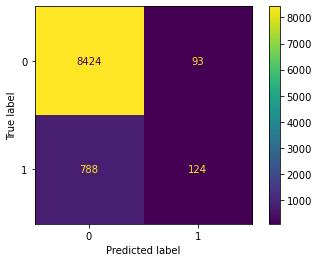

In [15]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter= 1000, random_state=15)
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)
y_pred_prob_lr= lr.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, roc_auc_score, accuracy_score 
cm= confusion_matrix(y_test, y_pred_lr, labels= lr.classes_)
print(cm)
print(classification_report(y_test, y_pred_lr, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_lr, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('AUC:', roc_auc_score(y_test, y_pred_prob_lr))
dcm_lr= ConfusionMatrixDisplay(cm, display_labels= lr.classes_)
dcm_lr.plot()

--- DecisionTreeClassifier ---

[[7709  808]
 [ 648  264]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8517
           1       0.25      0.29      0.27       912

    accuracy                           0.85      9429
   macro avg       0.58      0.60      0.59      9429
weighted avg       0.86      0.85      0.85      9429

Precision: 0.2462686567164179
Accuracy: 0.8455827765404603
AUC: 0.5967974396923388


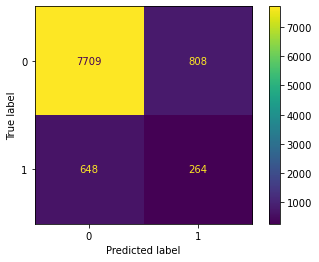

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=15)
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)
y_pred_prob_dt= dt.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_dt, labels= dt.classes_)
print(cm)
print(classification_report(y_test, y_pred_dt, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_dt, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('AUC:', roc_auc_score(y_test, y_pred_prob_dt))
dcm_dt= ConfusionMatrixDisplay(cm, display_labels= dt.classes_)
dcm_dt.plot()

--- Tuned - DecisionTreeClassifier ---

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid= {
             'max_depth': [None, 10, 20, 30, 40, 50],
             'min_samples_split': [2, 10, 20],
             'min_samples_leaf': [1, 5, 10],
             'max_features': [None, 'sqrt', 'log2'],
             'criterion': ['gini', 'entropy']
            }

gs_dt= GridSearchCV(estimator= dt, param_grid= param_grid, cv= 5, scoring= 'precision')
gs_dt.fit(X_train, y_train)

print("Best Parameters:", gs_dt.best_params_)
print("Best Precision Score:", gs_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Precision Score: 0.46569723206086844


[[8447   70]
 [ 842   70]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.50      0.08      0.13       912

    accuracy                           0.90      9429
   macro avg       0.70      0.53      0.54      9429
weighted avg       0.87      0.90      0.87      9429

Precision: 0.5
Accuracy: 0.9032771237671015
AUC: 0.799414908572947


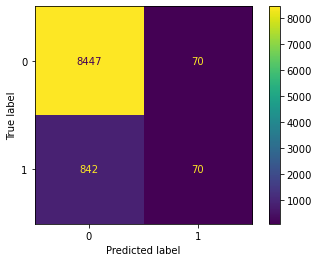

In [18]:
tuned_dt= gs_dt.best_estimator_
y_pred_tuned_dt= tuned_dt.predict(X_test)
y_pred_prob_tuned_dt= tuned_dt.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_dt, labels= tuned_dt.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_dt, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_dt))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_dt))
dcm_tuned_dt= ConfusionMatrixDisplay(cm, display_labels= tuned_dt.classes_)
dcm_tuned_dt.plot()

--- KNeighborsClassifier ---

[[8338  179]
 [ 808  104]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8517
           1       0.37      0.11      0.17       912

    accuracy                           0.90      9429
   macro avg       0.64      0.55      0.56      9429
weighted avg       0.86      0.90      0.87      9429

Precision: 0.3674911660777385
Accuracy: 0.8953229398663697
AUC: 0.7065606918258427


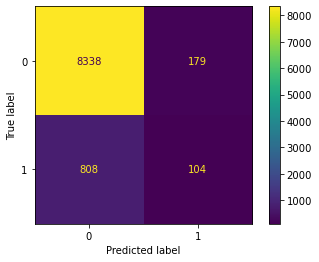

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)
y_pred_prob_knn= knn.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_knn, labels= knn.classes_)
print(cm)
print(classification_report(y_test, y_pred_knn, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_knn, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('AUC:', roc_auc_score(y_test, y_pred_prob_knn))
dcm_knn= ConfusionMatrixDisplay(cm, display_labels= knn.classes_)
dcm_knn.plot()

--- Tuned - KNeighborsClassifier ---

In [20]:
param_grid= {
             'n_neighbors': np.arange(1,40),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']
            }

gs_knn= GridSearchCV(estimator= knn, param_grid= param_grid, cv=5, scoring= 'precision')
gs_knn.fit(X_train, y_train)
print("Best Parameters:", gs_knn.best_params_)
print("Best Precision Score:", gs_knn.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'uniform'}
Best Precision Score: 0.6815538847117795


[[8505   12]
 [ 900   12]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8517
           1       0.50      0.01      0.03       912

    accuracy                           0.90      9429
   macro avg       0.70      0.51      0.49      9429
weighted avg       0.87      0.90      0.86      9429

Precision: 0.5
Accuracy: 0.9032771237671015
AUC: 0.8086405877615255


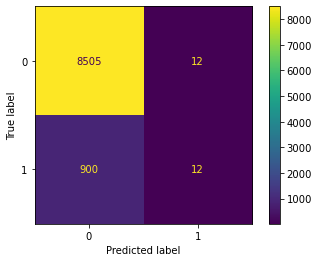

In [21]:
tuned_knn= gs_knn.best_estimator_
y_pred_tuned_knn= tuned_knn.predict(X_test)
y_pred_prob_tuned_knn= tuned_knn.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_knn, labels= tuned_knn.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_knn, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_knn))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_knn))
dcm_tuned_knn= ConfusionMatrixDisplay(cm, display_labels= tuned_knn.classes_)
dcm_tuned_knn.plot()

--- GaussianNB ---

[[5828 2689]
 [ 193  719]]
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      8517
           1       0.21      0.79      0.33       912

    accuracy                           0.69      9429
   macro avg       0.59      0.74      0.57      9429
weighted avg       0.89      0.69      0.76      9429

Precision: 0.21097417840375587
Accuracy: 0.6943472266412133
AUC: 0.8056105281696668


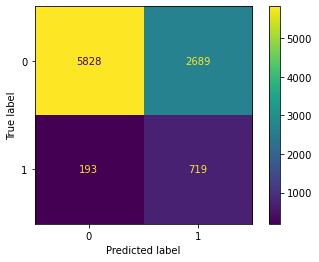

In [22]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)
y_pred_prob_nb= nb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_nb, labels= nb.classes_)
print(cm)
print(classification_report(y_test, y_pred_nb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_nb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_nb))
dcm_nb= ConfusionMatrixDisplay(cm, display_labels= nb.classes_)
dcm_nb.plot()

--- SVM ---

[[8501   16]
 [ 908    4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8517
           1       0.20      0.00      0.01       912

    accuracy                           0.90      9429
   macro avg       0.55      0.50      0.48      9429
weighted avg       0.84      0.90      0.86      9429

Precision: 0.2
Accuracy: 0.9020044543429844
AUC: 0.6972790744620151


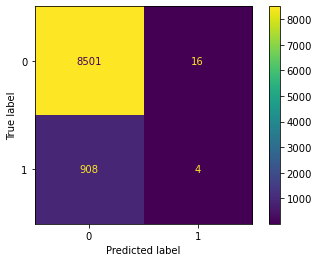

In [23]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf', gamma= 1, probability=True, random_state=15)
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
y_pred_prob_svc= svc.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_svc, labels= svc.classes_)
print(cm)
print(classification_report(y_test, y_pred_svc, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_svc, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('AUC:', roc_auc_score(y_test, y_pred_prob_svc))
dcm_svc= ConfusionMatrixDisplay(cm, display_labels= svc.classes_)
dcm_svc.plot()

--- Random Forest ---

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=15)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
y_pred_prob_rf= rf.predict_proba(X_test)[:,1]

[[8428   89]
 [ 846   66]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.43      0.07      0.12       912

    accuracy                           0.90      9429
   macro avg       0.67      0.53      0.54      9429
weighted avg       0.86      0.90      0.87      9429

Precision: 0.4258064516129032
Accuracy: 0.9008378407042105
AUC: 0.8206786890615054


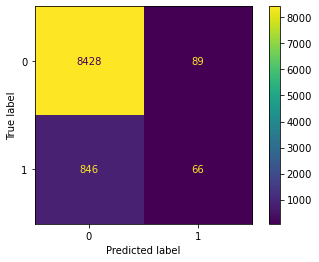

In [25]:
cm= confusion_matrix(y_test, y_pred_rf, labels= rf.classes_)
print(cm)
print(classification_report(y_test, y_pred_rf, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_rf, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('AUC:', roc_auc_score(y_test, y_pred_prob_rf))
dcm_rf= ConfusionMatrixDisplay(cm, display_labels= rf.classes_)
dcm_rf.plot()

In [26]:
param_grid= {
             'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
            }

gs_tuned_rf= GridSearchCV(estimator= rf, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_tuned_rf.fit(X_train, y_train)
print("Best Parameters:", gs_tuned_rf.best_params_)
print("Best Precision Score:", gs_tuned_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Precision Score: 0.6932043515080452


[[8503   14]
 [ 889   23]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8517
           1       0.62      0.03      0.05       912

    accuracy                           0.90      9429
   macro avg       0.76      0.51      0.50      9429
weighted avg       0.88      0.90      0.86      9429

Precision: 0.6216216216216216
Accuracy: 0.9042316258351893
AUC: 0.8498955391590399


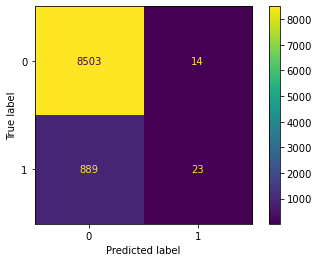

In [27]:
tuned_rf= gs_tuned_rf.best_estimator_
y_pred_tuned_rf= tuned_rf.predict(X_test)
y_pred_prob_tuned_rf= tuned_rf.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_rf, labels= tuned_rf.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_rf, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_rf))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_rf))
dcm_tuned_rf= ConfusionMatrixDisplay(cm, display_labels= tuned_rf.classes_)
dcm_tuned_rf.plot()

--- AdaBoost ---

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier(random_state=15)
ada.fit(X_train, y_train)
y_pred_ada= ada.predict(X_test)
y_pred_prob_ada= ada.predict_proba(X_test)[:,1]

[[8394  123]
 [ 777  135]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8517
           1       0.52      0.15      0.23       912

    accuracy                           0.90      9429
   macro avg       0.72      0.57      0.59      9429
weighted avg       0.88      0.90      0.88      9429

Precision: 0.5232558139534884
Accuracy: 0.9045497931912185
AUC: 0.8531471628466494


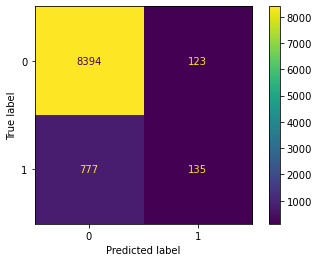

In [29]:
cm= confusion_matrix(y_test, y_pred_ada, labels= ada.classes_)
print(cm)
print(classification_report(y_test, y_pred_ada, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_ada, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_ada))
print('AUC:', roc_auc_score(y_test, y_pred_prob_ada))
dcm_ada= ConfusionMatrixDisplay(cm, display_labels= ada.classes_)
dcm_ada.plot()

In [30]:
param_grid= {'n_estimators': [50, 100, 200]}

gs_ada= GridSearchCV(estimator= ada, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_ada.fit(X_train, y_train)
print("Best Parameters:", gs_ada.best_params_)
print("Best Precision Score:", gs_ada.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100}
Best Precision Score: 0.5390309313775772


[[8391  126]
 [ 772  140]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8517
           1       0.53      0.15      0.24       912

    accuracy                           0.90      9429
   macro avg       0.72      0.57      0.59      9429
weighted avg       0.88      0.90      0.88      9429

Precision: 0.5263157894736842
Accuracy: 0.9047619047619048
AUC: 0.8532704328185734


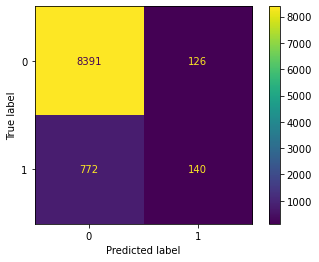

In [31]:
tuned_ada= gs_ada.best_estimator_
y_pred_tuned_ada= tuned_ada.predict(X_test)
y_pred_prob_tuned_ada= tuned_ada.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_ada, labels= tuned_ada.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_ada, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_ada))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_ada))
dcm_tuned_ada= ConfusionMatrixDisplay(cm, display_labels= tuned_ada.classes_)
dcm_tuned_ada.plot()

--- GradientBoosting ---

[[8427   90]
 [ 802  110]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.55      0.12      0.20       912

    accuracy                           0.91      9429
   macro avg       0.73      0.56      0.57      9429
weighted avg       0.88      0.91      0.88      9429

Precision: 0.55
Accuracy: 0.9053982394739633
AUC: 0.8550621924365922


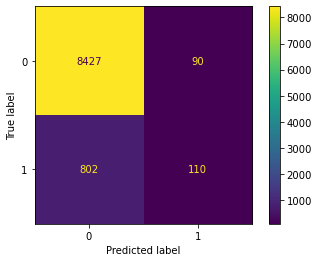

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
grb= GradientBoostingClassifier(random_state=15)
grb.fit(X_train, y_train)
y_pred_grb= grb.predict(X_test)
y_pred_prob_grb= grb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_grb, labels= grb.classes_)
print(cm)
print(classification_report(y_test, y_pred_grb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_grb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_grb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_grb))
dcm_grb= ConfusionMatrixDisplay(cm, display_labels= grb.classes_)
dcm_grb.plot()

In [33]:
param_grid= {'learning_rate': [0.01, 0.1, 0.2]}

gs_grb= GridSearchCV(estimator= grb, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_grb.fit(X_train, y_train)

print("Best Parameters:", gs_grb.best_params_)
print("Best Precision Score:", gs_grb.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.1}
Best Precision Score: 0.5509480931292992


[[8427   90]
 [ 802  110]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.55      0.12      0.20       912

    accuracy                           0.91      9429
   macro avg       0.73      0.56      0.57      9429
weighted avg       0.88      0.91      0.88      9429

Precision: 0.55
Accuracy: 0.9053982394739633
AUC: 0.8550621924365922


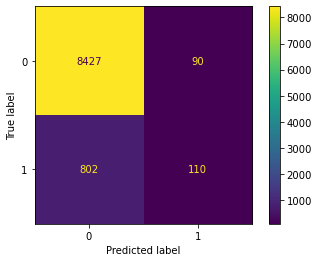

In [34]:
tuned_grb= gs_grb.best_estimator_
y_pred_tuned_grb= tuned_grb.predict(X_test)
y_pred_prob_tuned_grb= tuned_grb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_grb, labels= tuned_grb.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_grb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_grb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_grb))
dcm_tuned_grb= ConfusionMatrixDisplay(cm, display_labels= tuned_grb.classes_)
dcm_tuned_grb.plot()

--- XGB ---

[[8377  140]
 [ 794  118]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8517
           1       0.46      0.13      0.20       912

    accuracy                           0.90      9429
   macro avg       0.69      0.56      0.57      9429
weighted avg       0.87      0.90      0.88      9429

Precision: 0.4573643410852713
Accuracy: 0.9009438964895535
AUC: 0.832983092123287


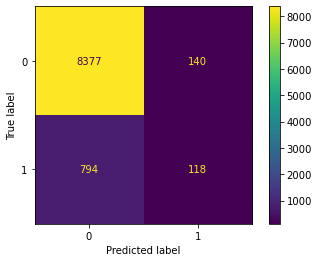

In [35]:
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state=15)
xgb.fit(X_train, y_train)
y_pred_xgb= xgb.predict(X_test)
y_pred_prob_xgb= xgb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_xgb, labels= xgb.classes_)
print(cm)
print(classification_report(y_test, y_pred_xgb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_xgb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_xgb))
dcm_xgb= ConfusionMatrixDisplay(cm, display_labels= xgb.classes_)
dcm_xgb.plot()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.1}
Best Precision Score: 0.5129835358709718
[[8433   84]
 [ 816   96]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.53      0.11      0.18       912

    accuracy                           0.90      9429
   macro avg       0.72      0.55      0.56      9429
weighted avg       0.88      0.90      0.87      9429

Precision: 0.5333333333333333
Accuracy: 0.9045497931912185
AUC: 0.8516466808385293


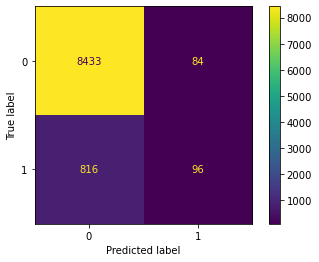

In [36]:
params_XGBoost= {'learning_rate': [0.01, 0.1, 1.0]}

gs_xgb= GridSearchCV(estimator= xgb, param_grid= params_XGBoost, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_xgb.fit(X_train, y_train)

print("Best Parameters:", gs_xgb.best_params_)
print("Best Precision Score:", gs_xgb.best_score_)

tuned_xgb= gs_xgb.best_estimator_
y_pred_tuned_xgb= tuned_xgb.predict(X_test)
y_pred_prob_tuned_xgb= tuned_xgb.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_tuned_xgb, labels= tuned_xgb.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_xgb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_xgb))
dcm_tuned_xgb= ConfusionMatrixDisplay(cm, display_labels= tuned_xgb.classes_)
dcm_tuned_xgb.plot()

--- LGBM ---

[LightGBM] [Info] Number of positive: 3649, number of negative: 34065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 37714, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096755 -> initscore=-2.233817
[LightGBM] [Info] Start training from score -2.233817
[[8439   78]
 [ 820   92]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8517
           1       0.54      0.10      0.17       912

    accuracy                           0.90      9429
   macro avg       0.73      0.55      0.56      9429
weighted avg       0.88      0.90      0.87      9429

Precision: 0.5411764705882353
Accuracy: 0.9047619047619048
AUC: 0.848600914785496


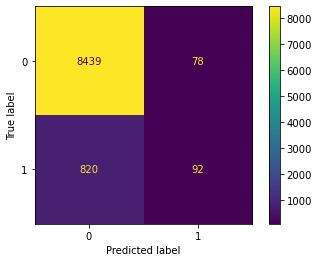

In [37]:
from lightgbm import LGBMClassifier
lgm= LGBMClassifier(random_state=15)
lgm.fit(X_train, y_train)
y_pred_lgm= lgm.predict(X_test)
y_pred_prob_lgm= lgm.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_lgm, labels= lgm.classes_)
print(cm)
print(classification_report(y_test, y_pred_lgm, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_lgm, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_lgm))
print('AUC:', roc_auc_score(y_test, y_pred_prob_lgm))
dcm_lgm= ConfusionMatrixDisplay(cm, display_labels= lgm.classes_)
dcm_lgm.plot()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 3649, number of negative: 34065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 37714, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096755 -> initscore=-2.233817
[LightGBM] [Info] Start training from score -2.233817
Best Parameters: {'learning_rate': 0.01, 'min_data_in_leaf': 30, 'num_leaves': 127, 'reg_alpha': 0.1}
Best Precision Score: 0.6
[LightGBM]

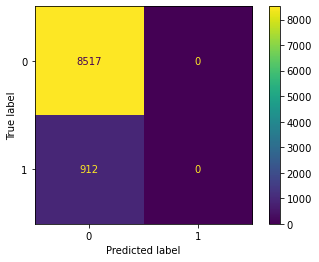

In [38]:
params_LGB= {'learning_rate': [0.001, 0.01, 0.1, 1.0],
             'num_leaves': [31, 127],
             'reg_alpha': [0.1, 0.5],
             'min_data_in_leaf': [30, 50, 100, 300, 400]}

gs_lgm= GridSearchCV(estimator= lgm, param_grid= params_LGB, cv=5, scoring='precision', n_jobs=-1, verbose=2)
gs_lgm.fit(X_train, y_train)

print("Best Parameters:", gs_lgm.best_params_)
print("Best Precision Score:", gs_lgm.best_score_)

tuned_lgm= gs_lgm.best_estimator_
y_pred_tuned_lgm= tuned_lgm.predict(X_test)
y_pred_prob_tuned_lgm= tuned_lgm.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_tuned_lgm, labels= tuned_lgm.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_lgm, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_lgm))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_lgm))
dcm_tuned_lgm= ConfusionMatrixDisplay(cm, display_labels= tuned_lgm.classes_)
dcm_tuned_lgm.plot()

--- CatBoost ---

Learning rate set to 0.04854
0:	learn: 0.6390849	total: 161ms	remaining: 2m 41s
1:	learn: 0.5937888	total: 180ms	remaining: 1m 29s
2:	learn: 0.5573397	total: 208ms	remaining: 1m 9s
3:	learn: 0.5183734	total: 228ms	remaining: 56.9s
4:	learn: 0.4915505	total: 247ms	remaining: 49.1s
5:	learn: 0.4629431	total: 265ms	remaining: 43.9s
6:	learn: 0.4394643	total: 283ms	remaining: 40.2s
7:	learn: 0.4203563	total: 301ms	remaining: 37.3s
8:	learn: 0.4018322	total: 320ms	remaining: 35.2s
9:	learn: 0.3857597	total: 340ms	remaining: 33.7s
10:	learn: 0.3718986	total: 357ms	remaining: 32.1s
11:	learn: 0.3580574	total: 368ms	remaining: 30.3s
12:	learn: 0.3481623	total: 380ms	remaining: 28.9s
13:	learn: 0.3389341	total: 392ms	remaining: 27.6s
14:	learn: 0.3310245	total: 411ms	remaining: 27s
15:	learn: 0.3232157	total: 425ms	remaining: 26.1s
16:	learn: 0.3161048	total: 440ms	remaining: 25.4s
17:	learn: 0.3109163	total: 452ms	remaining: 24.6s
18:	learn: 0.3049972	total: 466ms	remaining: 24.1s
19:	learn: 0

161:	learn: 0.2363954	total: 6.63s	remaining: 34.3s
162:	learn: 0.2363063	total: 6.67s	remaining: 34.2s
163:	learn: 0.2362263	total: 6.71s	remaining: 34.2s
164:	learn: 0.2361188	total: 6.78s	remaining: 34.3s
165:	learn: 0.2360553	total: 6.86s	remaining: 34.5s
166:	learn: 0.2359972	total: 6.92s	remaining: 34.5s
167:	learn: 0.2359635	total: 6.99s	remaining: 34.6s
168:	learn: 0.2359123	total: 7.08s	remaining: 34.8s
169:	learn: 0.2358662	total: 7.17s	remaining: 35s
170:	learn: 0.2357982	total: 7.22s	remaining: 35s
171:	learn: 0.2357075	total: 7.3s	remaining: 35.1s
172:	learn: 0.2356281	total: 7.36s	remaining: 35.2s
173:	learn: 0.2355814	total: 7.42s	remaining: 35.2s
174:	learn: 0.2355020	total: 7.5s	remaining: 35.3s
175:	learn: 0.2354213	total: 7.56s	remaining: 35.4s
176:	learn: 0.2353368	total: 7.66s	remaining: 35.6s
177:	learn: 0.2352342	total: 7.77s	remaining: 35.9s
178:	learn: 0.2351318	total: 7.86s	remaining: 36.1s
179:	learn: 0.2350745	total: 7.93s	remaining: 36.1s
180:	learn: 0.2350

324:	learn: 0.2244801	total: 11.3s	remaining: 23.6s
325:	learn: 0.2243990	total: 11.4s	remaining: 23.5s
326:	learn: 0.2243283	total: 11.4s	remaining: 23.5s
327:	learn: 0.2242464	total: 11.4s	remaining: 23.4s
328:	learn: 0.2242081	total: 11.5s	remaining: 23.4s
329:	learn: 0.2241524	total: 11.5s	remaining: 23.3s
330:	learn: 0.2240700	total: 11.5s	remaining: 23.3s
331:	learn: 0.2240211	total: 11.6s	remaining: 23.3s
332:	learn: 0.2239739	total: 11.6s	remaining: 23.2s
333:	learn: 0.2239212	total: 11.6s	remaining: 23.2s
334:	learn: 0.2238843	total: 11.6s	remaining: 23.1s
335:	learn: 0.2238049	total: 11.7s	remaining: 23.1s
336:	learn: 0.2237290	total: 11.7s	remaining: 23s
337:	learn: 0.2236860	total: 11.7s	remaining: 23s
338:	learn: 0.2235874	total: 11.8s	remaining: 22.9s
339:	learn: 0.2235293	total: 11.8s	remaining: 22.9s
340:	learn: 0.2234927	total: 11.8s	remaining: 22.9s
341:	learn: 0.2234355	total: 11.9s	remaining: 22.8s
342:	learn: 0.2233708	total: 11.9s	remaining: 22.8s
343:	learn: 0.22

484:	learn: 0.2151355	total: 16.5s	remaining: 17.5s
485:	learn: 0.2150791	total: 16.5s	remaining: 17.5s
486:	learn: 0.2150380	total: 16.6s	remaining: 17.5s
487:	learn: 0.2149644	total: 16.6s	remaining: 17.4s
488:	learn: 0.2149331	total: 16.6s	remaining: 17.4s
489:	learn: 0.2149327	total: 16.7s	remaining: 17.3s
490:	learn: 0.2149011	total: 16.7s	remaining: 17.3s
491:	learn: 0.2148702	total: 16.7s	remaining: 17.3s
492:	learn: 0.2148472	total: 16.7s	remaining: 17.2s
493:	learn: 0.2147714	total: 16.8s	remaining: 17.2s
494:	learn: 0.2147044	total: 16.8s	remaining: 17.1s
495:	learn: 0.2146498	total: 16.8s	remaining: 17.1s
496:	learn: 0.2146129	total: 16.9s	remaining: 17.1s
497:	learn: 0.2145578	total: 16.9s	remaining: 17s
498:	learn: 0.2145038	total: 16.9s	remaining: 17s
499:	learn: 0.2144487	total: 17s	remaining: 17s
500:	learn: 0.2144097	total: 17s	remaining: 16.9s
501:	learn: 0.2143554	total: 17s	remaining: 16.9s
502:	learn: 0.2142778	total: 17s	remaining: 16.8s
503:	learn: 0.2142318	tota

649:	learn: 0.2069615	total: 20s	remaining: 10.8s
650:	learn: 0.2069204	total: 20s	remaining: 10.7s
651:	learn: 0.2068583	total: 20.1s	remaining: 10.7s
652:	learn: 0.2068105	total: 20.1s	remaining: 10.7s
653:	learn: 0.2067549	total: 20.1s	remaining: 10.6s
654:	learn: 0.2067052	total: 20.1s	remaining: 10.6s
655:	learn: 0.2066673	total: 20.1s	remaining: 10.5s
656:	learn: 0.2066201	total: 20.1s	remaining: 10.5s
657:	learn: 0.2065747	total: 20.1s	remaining: 10.5s
658:	learn: 0.2065424	total: 20.2s	remaining: 10.4s
659:	learn: 0.2065132	total: 20.2s	remaining: 10.4s
660:	learn: 0.2064594	total: 20.2s	remaining: 10.3s
661:	learn: 0.2064039	total: 20.2s	remaining: 10.3s
662:	learn: 0.2063625	total: 20.2s	remaining: 10.3s
663:	learn: 0.2062883	total: 20.2s	remaining: 10.2s
664:	learn: 0.2062475	total: 20.2s	remaining: 10.2s
665:	learn: 0.2062095	total: 20.2s	remaining: 10.2s
666:	learn: 0.2061566	total: 20.3s	remaining: 10.1s
667:	learn: 0.2061266	total: 20.3s	remaining: 10.1s
668:	learn: 0.20

810:	learn: 0.2000467	total: 26.4s	remaining: 6.16s
811:	learn: 0.2000105	total: 26.5s	remaining: 6.13s
812:	learn: 0.1999563	total: 26.5s	remaining: 6.1s
813:	learn: 0.1999315	total: 26.6s	remaining: 6.07s
814:	learn: 0.1999297	total: 26.6s	remaining: 6.04s
815:	learn: 0.1999131	total: 26.7s	remaining: 6.02s
816:	learn: 0.1998880	total: 26.7s	remaining: 5.98s
817:	learn: 0.1998404	total: 26.8s	remaining: 5.96s
818:	learn: 0.1998159	total: 26.8s	remaining: 5.92s
819:	learn: 0.1997654	total: 26.8s	remaining: 5.89s
820:	learn: 0.1997417	total: 26.9s	remaining: 5.88s
821:	learn: 0.1997073	total: 27s	remaining: 5.84s
822:	learn: 0.1996700	total: 27s	remaining: 5.81s
823:	learn: 0.1996547	total: 27s	remaining: 5.77s
824:	learn: 0.1996173	total: 27.1s	remaining: 5.74s
825:	learn: 0.1995568	total: 27.1s	remaining: 5.71s
826:	learn: 0.1995273	total: 27.1s	remaining: 5.67s
827:	learn: 0.1994873	total: 27.2s	remaining: 5.64s
828:	learn: 0.1994384	total: 27.2s	remaining: 5.61s
829:	learn: 0.19939

972:	learn: 0.1935949	total: 29.4s	remaining: 816ms
973:	learn: 0.1935542	total: 29.4s	remaining: 785ms
974:	learn: 0.1935034	total: 29.4s	remaining: 755ms
975:	learn: 0.1935013	total: 29.4s	remaining: 724ms
976:	learn: 0.1935008	total: 29.5s	remaining: 693ms
977:	learn: 0.1934822	total: 29.5s	remaining: 663ms
978:	learn: 0.1934582	total: 29.5s	remaining: 632ms
979:	learn: 0.1934317	total: 29.5s	remaining: 602ms
980:	learn: 0.1934187	total: 29.5s	remaining: 571ms
981:	learn: 0.1933761	total: 29.5s	remaining: 541ms
982:	learn: 0.1933231	total: 29.5s	remaining: 511ms
983:	learn: 0.1933038	total: 29.5s	remaining: 480ms
984:	learn: 0.1932789	total: 29.5s	remaining: 450ms
985:	learn: 0.1932556	total: 29.6s	remaining: 420ms
986:	learn: 0.1932058	total: 29.6s	remaining: 390ms
987:	learn: 0.1931722	total: 29.6s	remaining: 359ms
988:	learn: 0.1931268	total: 29.6s	remaining: 329ms
989:	learn: 0.1930915	total: 29.6s	remaining: 299ms
990:	learn: 0.1930610	total: 29.6s	remaining: 269ms
991:	learn: 

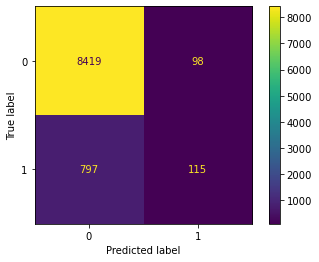

In [39]:
from catboost import CatBoostClassifier
cat= CatBoostClassifier(random_state=15)
cat.fit(X_train, y_train)
y_pred_cat= cat.predict(X_test)
y_pred_prob_cat= cat.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_cat, labels= cat.classes_)
print(cm)
print(classification_report(y_test, y_pred_cat, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_cat, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_cat))
print('AUC:', roc_auc_score(y_test, y_pred_prob_cat))
dcm_cat= ConfusionMatrixDisplay(cm, display_labels= cat.classes_)
dcm_cat.plot()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6816196	total: 45.6ms	remaining: 4.52s
1:	learn: 0.6714722	total: 88.1ms	remaining: 4.32s
2:	learn: 0.6613995	total: 115ms	remaining: 3.73s
3:	learn: 0.6513357	total: 155ms	remaining: 3.72s
4:	learn: 0.6413585	total: 195ms	remaining: 3.7s
5:	learn: 0.6312247	total: 233ms	remaining: 3.65s
6:	learn: 0.6222469	total: 285ms	remaining: 3.78s
7:	learn: 0.6136571	total: 312ms	remaining: 3.58s
8:	learn: 0.6052308	total: 374ms	remaining: 3.78s
9:	learn: 0.5963060	total: 399ms	remaining: 3.59s
10:	learn: 0.5880142	total: 435ms	remaining: 3.52s
11:	learn: 0.5800307	total: 496ms	remaining: 3.64s
12:	learn: 0.5718503	total: 528ms	remaining: 3.53s
13:	learn: 0.5638283	total: 556ms	remaining: 3.41s
14:	learn: 0.5561548	total: 607ms	remaining: 3.44s
15:	learn: 0.5482328	total: 635ms	remaining: 3.33s
16:	learn: 0.5406864	total: 670ms	remaining: 3.27s
17:	learn: 0.5335859	total: 703ms	remaining: 3.2s
18:	learn: 0.5271269	total: 75

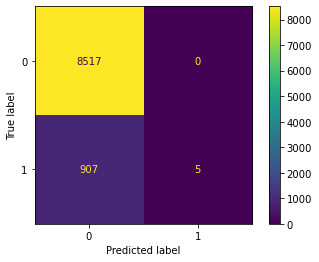

In [40]:
params_CatBoost= {
                  'depth': [3,5,10],
                  'learning_rate' : [0.01,0.1,1],
                  'iterations' : [5,10,50,100]
                 }

gs_cat= GridSearchCV(estimator= cat, param_grid= params_CatBoost, cv=5, scoring='precision', n_jobs=-1, verbose=2)
gs_cat.fit(X_train, y_train)

print("Best Parameters:", gs_cat.best_params_)
print("Best Precision Score:", gs_cat.best_score_)

tuned_cat= gs_cat.best_estimator_
y_pred_tuned_cat= tuned_cat.predict(X_test)
y_pred_prob_tuned_cat= tuned_cat.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_cat, labels= tuned_cat.classes_)
print(cm)
print(classification_report(y_test, y_pred_tuned_cat, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_cat))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_cat))
dcm_tuned_cat= ConfusionMatrixDisplay(cm, display_labels= tuned_cat.classes_)
dcm_tuned_cat.plot()

In [41]:
from pycaret.classification import *
s= setup(df, target = 'HeartDiseaseorAttack')

,Description,Value
0,Session id,3477
1,Target,HeartDiseaseorAttack
2,Target type,Binary
3,Original data shape,"(47143, 43)"
4,Transformed data shape,"(47143, 43)"
5,Transformed train set shape,"(33000, 43)"
6,Transformed test set shape,"(14143, 43)"
7,Numeric features,42
8,Preprocess,True
9,Imputation type,simple


In [42]:
best_model= compare_models(sort= 'Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9048,0.0000,0.0282,0.6913,0.0541,0.0469,0.1260,0.0810
gbc,Gradient Boosting Classifier,0.9055,0.8417,0.1159,0.5557,0.1916,0.1636,0.2225,1.8860
lr,Logistic Regression,0.9049,0.8416,0.1256,0.5377,0.2034,0.1732,0.2266,3.3070
lightgbm,Light Gradient Boosting Machine,0.9046,0.8348,0.1065,0.5366,0.1775,0.1502,0.2079,4.6010
ada,Ada Boost Classifier,0.9047,0.8401,0.1459,0.5275,0.2285,0.1947,0.2415,1.0110
catboost,CatBoost Classifier,0.9032,0.8320,0.1231,0.5006,0.1974,0.1655,0.2131,10.5380
lda,Linear Discriminant Analysis,0.8999,0.8370,0.2029,0.4602,0.2815,0.2364,0.2595,0.1990
svm,SVM - Linear Kernel,0.8956,0.0000,0.1642,0.4452,0.2052,0.1684,0.1973,0.6520
xgboost,Extreme Gradient Boosting,0.8996,0.8171,0.1353,0.4430,0.2068,0.1690,0.2038,1.6550
rf,Random Forest Classifier,0.9014,0.8078,0.0714,0.4409,0.1228,0.0985,0.1468,1.0580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [43]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=3477, solver='auto',
                tol=0.0001)


In [44]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9055,0.0000,0.0313,0.7692,0.0602,0.0531,0.1431
1,0.9042,0.0000,0.0188,0.6667,0.0366,0.0314,0.1009
2,0.9042,0.0000,0.0251,0.6154,0.0482,0.0409,0.1104
3,0.9039,0.0000,0.0188,0.6000,0.0365,0.0308,0.0939
4,0.9052,0.0000,0.0282,0.7500,0.0544,0.0477,0.1336
5,0.9039,0.0000,0.0157,0.6250,0.0306,0.0260,0.0881
6,0.9055,0.0000,0.0282,0.8182,0.0545,0.0484,0.1412
7,0.9042,0.0000,0.0250,0.6667,0.0482,0.0415,0.1163
8,0.9058,0.0000,0.0375,0.8000,0.0716,0.0635,0.1605


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


--- Visualisation ---

In [45]:
print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, zero_division= 0))
print('Decision Tree Precision:', precision_score(y_test, y_pred_dt, zero_division= 0))
print('Tuned Decision Tree Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division= 0))
print('KNeighborsClassifier Precision:', precision_score(y_test, y_pred_knn, zero_division= 0))
print('Tuned KNeighborsClassifier Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division= 0))
print('GaussianNB Precision:', precision_score(y_test, y_pred_nb, zero_division= 0))
print('SVM Precision:', precision_score(y_test, y_pred_svc, zero_division= 0))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, zero_division= 0))
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division= 0))
print('AdaBoost Precision:', precision_score(y_test, y_pred_ada, zero_division= 0))
print('Tuned AdaBoost Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division= 0))
print('GradientBoosting Precision:', precision_score(y_test, y_pred_grb, zero_division= 0))
print('Tuned GradientBoosting Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division= 0))
print('XGB Precision:', precision_score(y_test, y_pred_xgb, zero_division= 0))
print('Tuned XGB Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division= 0))
print('LGBM Precision:', precision_score(y_test, y_pred_lgm, zero_division= 0))
print('Tuned LGBM Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division= 0))
print('CatBoost Precision:', precision_score(y_test, y_pred_cat, zero_division= 0))
print('Tuned CatBoost Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division= 0))

Logistic Regression Precision: 0.5714285714285714
Decision Tree Precision: 0.2462686567164179
Tuned Decision Tree Precision: 0.5
KNeighborsClassifier Precision: 0.3674911660777385
Tuned KNeighborsClassifier Precision: 0.5
GaussianNB Precision: 0.21097417840375587
SVM Precision: 0.2
Random Forest Precision: 0.4258064516129032
Tuned Random Forest Precision: 0.6216216216216216
AdaBoost Precision: 0.5232558139534884
Tuned AdaBoost Precision: 0.5263157894736842
GradientBoosting Precision: 0.55
Tuned GradientBoosting Precision: 0.55
XGB Precision: 0.4573643410852713
Tuned XGB Precision: 0.5333333333333333
LGBM Precision: 0.5411764705882353
Tuned LGBM Precision: 0.0
CatBoost Precision: 0.539906103286385
Tuned CatBoost Precision: 1.0


In [46]:
precision_scores= {
                    'Logistic Regression Precision:': precision_score(y_test, y_pred_lr, zero_division= 0),
                    'Decision Tree Precision:': precision_score(y_test, y_pred_dt, zero_division= 0),
                    'Tuned Decision Tree Precision:': precision_score(y_test, y_pred_tuned_dt, zero_division= 0),
                    'KNeighborsClassifier Precision:': precision_score(y_test, y_pred_knn, zero_division= 0),
                    'Tuned KNeighborsClassifier Precision:': precision_score(y_test, y_pred_tuned_knn, zero_division= 0),
                    'GaussianNB Precision:': precision_score(y_test, y_pred_nb, zero_division= 0),
                    'SVM Precision:': precision_score(y_test, y_pred_svc, zero_division= 0),
                    'Random Forest Precision:': precision_score(y_test, y_pred_rf, zero_division= 0),
                    'Tuned Random Forest Precision:': precision_score(y_test, y_pred_tuned_rf, zero_division= 0),
                    'AdaBoost Precision:': precision_score(y_test, y_pred_ada, zero_division= 0),
                    'Tuned AdaBoost Precision:': precision_score(y_test, y_pred_tuned_ada, zero_division= 0),
                    'GradientBoosting Precision:': precision_score(y_test, y_pred_grb, zero_division= 0),
                    'Tuned GradientBoosting Precision:': precision_score(y_test, y_pred_tuned_grb, zero_division= 0),
                    'XGB Precision:': precision_score(y_test, y_pred_xgb, zero_division= 0),
                    'Tuned XGB Precision:': precision_score(y_test, y_pred_tuned_xgb, zero_division= 0),
                    'LGBM Precision:': precision_score(y_test, y_pred_lgm, zero_division= 0),
                    'Tuned LGBM Precision:': precision_score(y_test, y_pred_tuned_lgm, zero_division= 0),
                    'CatBoost Precision:': precision_score(y_test, y_pred_cat, zero_division= 0),
                    'Tuned CatBoost Precision:': precision_score(y_test, y_pred_tuned_cat, zero_division= 0)
                  }

ml_precision= pd.DataFrame(list(precision_scores.items()), columns= ['Model', 'Precision Score'])
ml_precision= ml_precision.sort_values(by= 'Precision Score', ascending=False)
print(ml_precision)

                                    Model  Precision Score
18              Tuned CatBoost Precision:         1.000000
8          Tuned Random Forest Precision:         0.621622
0          Logistic Regression Precision:         0.571429
11            GradientBoosting Precision:         0.550000
12      Tuned GradientBoosting Precision:         0.550000
15                        LGBM Precision:         0.541176
17                    CatBoost Precision:         0.539906
14                   Tuned XGB Precision:         0.533333
10              Tuned AdaBoost Precision:         0.526316
9                     AdaBoost Precision:         0.523256
4   Tuned KNeighborsClassifier Precision:         0.500000
2          Tuned Decision Tree Precision:         0.500000
13                         XGB Precision:         0.457364
7                Random Forest Precision:         0.425806
3         KNeighborsClassifier Precision:         0.367491
1                Decision Tree Precision:         0.2462

In [47]:
accuracy_scores= {
                    'Logistic Regression Accuracy:': accuracy_score(y_test, y_pred_lr),
                    'Decision Tree Accuracy:': accuracy_score(y_test, y_pred_dt),
                    'Tuned Decision Tree Accuracy:': accuracy_score(y_test, y_pred_tuned_dt),
                    'KNeighborsClassifier Accuracy:': accuracy_score(y_test, y_pred_knn),
                    'Tuned KNeighborsClassifier Accuracy:': accuracy_score(y_test, y_pred_tuned_knn),
                    'GaussianNB Accuracy:': accuracy_score(y_test, y_pred_nb),
                    'SVM Accuracy:': accuracy_score(y_test, y_pred_svc),
                    'Random Forest Accuracy:': accuracy_score(y_test, y_pred_rf),
                    'Tuned Random Forest Accuracy:': accuracy_score(y_test, y_pred_tuned_rf),
                    'AdaBoost Accuracy:': accuracy_score(y_test, y_pred_ada),
                    'Tuned AdaBoost Accuracy:': accuracy_score(y_test, y_pred_tuned_ada),
                    'GradientBoosting Accuracy:': accuracy_score(y_test, y_pred_grb),
                    'Tuned GradientBoosting Accuracy:': accuracy_score(y_test, y_pred_tuned_grb),
                    'XGB Accuracy:': accuracy_score(y_test, y_pred_xgb),
                    'Tuned XGB Accuracy:': accuracy_score(y_test, y_pred_tuned_xgb),
                    'LGBM Accuracy:': accuracy_score(y_test, y_pred_lgm),
                    'Tuned LGBM Accuracy:': accuracy_score(y_test, y_pred_tuned_lgm),
                    'CatBoost Accuracy:': accuracy_score(y_test, y_pred_cat),
                    'Tuned CatBoost Accuracy:': accuracy_score(y_test, y_pred_tuned_cat)
                  }

ml_accuracy= pd.DataFrame(list(accuracy_scores.items()), columns= ['Model', 'Accuracy Score'])
ml_accuracy= ml_accuracy.sort_values(by= 'Accuracy Score', ascending=False)
print(ml_accuracy)

                                   Model  Accuracy Score
0          Logistic Regression Accuracy:        0.906565
12      Tuned GradientBoosting Accuracy:        0.905398
11            GradientBoosting Accuracy:        0.905398
17                    CatBoost Accuracy:        0.905080
10              Tuned AdaBoost Accuracy:        0.904762
15                        LGBM Accuracy:        0.904762
14                   Tuned XGB Accuracy:        0.904550
9                     AdaBoost Accuracy:        0.904550
8          Tuned Random Forest Accuracy:        0.904232
18              Tuned CatBoost Accuracy:        0.903807
4   Tuned KNeighborsClassifier Accuracy:        0.903277
16                  Tuned LGBM Accuracy:        0.903277
2          Tuned Decision Tree Accuracy:        0.903277
6                          SVM Accuracy:        0.902004
13                         XGB Accuracy:        0.900944
7                Random Forest Accuracy:        0.900838
3         KNeighborsClassifier 

In [48]:
auc_scores= {
                    'Logistic Regression AUC:': roc_auc_score(y_test, y_pred_prob_lr),
                    'Decision Tree AUC:': roc_auc_score(y_test, y_pred_prob_dt),
                    'Tuned Decision Tree AUC:': roc_auc_score(y_test, y_pred_prob_tuned_dt),
                    'KNeighborsClassifier AUC:': roc_auc_score(y_test, y_pred_prob_knn),
                    'Tuned KNeighborsClassifier AUC:': roc_auc_score(y_test, y_pred_prob_tuned_knn),
                    'GaussianNB AUC:': roc_auc_score(y_test, y_pred_prob_nb),
                    'SVM AUC:': roc_auc_score(y_test, y_pred_prob_svc),
                    'Random Forest AUC:': roc_auc_score(y_test, y_pred_prob_rf),
                    'Tuned Random Forest AUC:': roc_auc_score(y_test, y_pred_prob_tuned_rf),
                    'AdaBoost AUC:': roc_auc_score(y_test, y_pred_prob_ada),
                    'Tuned AdaBoost AUC:': roc_auc_score(y_test, y_pred_prob_tuned_ada),
                    'GradientBoosting AUC:': roc_auc_score(y_test, y_pred_prob_grb),
                    'Tuned GradientBoosting AUC:': roc_auc_score(y_test, y_pred_prob_tuned_grb),
                    'XGB AUC:': roc_auc_score(y_test, y_pred_prob_xgb),
                    'Tuned XGB AUC:': roc_auc_score(y_test, y_pred_prob_tuned_xgb),
                    'LGBM AUC:': roc_auc_score(y_test, y_pred_prob_lgm),
                    'Tuned LGBM AUC:': roc_auc_score(y_test, y_pred_prob_tuned_lgm),
                    'CatBoost AUC:': roc_auc_score(y_test, y_pred_prob_cat),
                    'Tuned CatBoost AUC:': roc_auc_score(y_test, y_pred_prob_tuned_cat)
                  }

ml_auc= pd.DataFrame(list(auc_scores.items()), columns= ['Model', 'AUC Score'])
ml_auc= ml_auc.sort_values(by= 'AUC Score', ascending=False)
print(ml_auc)

                              Model  AUC Score
12      Tuned GradientBoosting AUC:   0.855062
11            GradientBoosting AUC:   0.855062
0          Logistic Regression AUC:   0.854503
10              Tuned AdaBoost AUC:   0.853270
9                     AdaBoost AUC:   0.853147
14                   Tuned XGB AUC:   0.851647
8          Tuned Random Forest AUC:   0.849896
15                        LGBM AUC:   0.848601
17                    CatBoost AUC:   0.846716
16                  Tuned LGBM AUC:   0.842403
18              Tuned CatBoost AUC:   0.840358
13                         XGB AUC:   0.832983
7                Random Forest AUC:   0.820679
4   Tuned KNeighborsClassifier AUC:   0.808641
5                   GaussianNB AUC:   0.805611
2          Tuned Decision Tree AUC:   0.799415
3         KNeighborsClassifier AUC:   0.706561
6                          SVM AUC:   0.697279
1                Decision Tree AUC:   0.596797


Logistic Regression Precision: 0.5714285714285714
Decision Tree Precision: 0.2462686567164179
Tuned Decision Tree Precision: 0.5


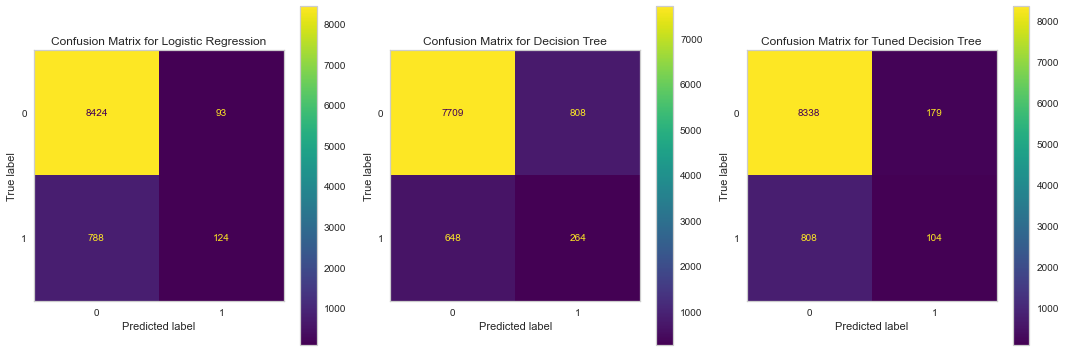

In [49]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, zero_division= 0))
print('Decision Tree Precision:', precision_score(y_test, y_pred_dt, zero_division= 0))
print('Tuned Decision Tree Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division= 0))

dcm_lr.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for Logistic Regression')
axes[0].grid(linewidth= 0)

dcm_dt.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Decision Tree')
axes[1].grid(linewidth= 0)

dcm_knn.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned Decision Tree')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

KNeighborsClassifier Precision: 0.3674911660777385
Tuned KNeighborsClassifier Precision: 0.5
GaussianNB Precision: 0.21097417840375587


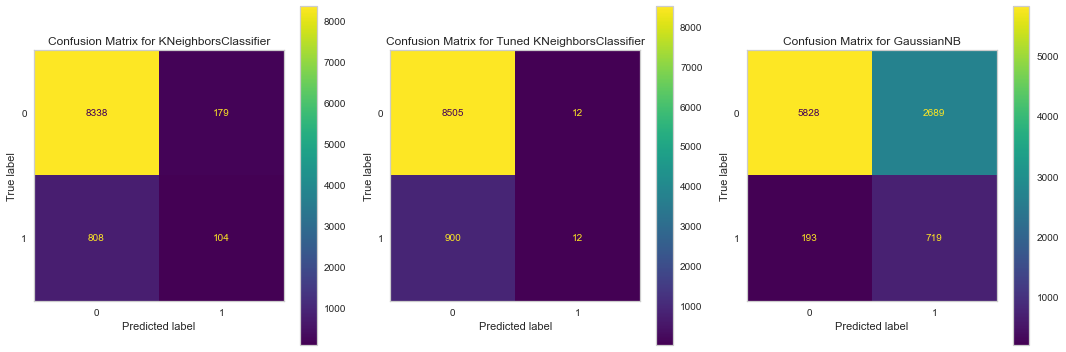

In [50]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))
print('KNeighborsClassifier Precision:', precision_score(y_test, y_pred_knn, zero_division= 0))
print('Tuned KNeighborsClassifier Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division= 0))
print('GaussianNB Precision:', precision_score(y_test, y_pred_nb, zero_division= 0))

dcm_knn.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for KNeighborsClassifier')
axes[0].grid(linewidth= 0)

dcm_tuned_knn.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned KNeighborsClassifier')
axes[1].grid(linewidth= 0)

dcm_nb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for GaussianNB')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

SVM Precision: 0.2
Random Forest Precision: 0.4258064516129032
Tuned Random Forest Precision: 0.6216216216216216


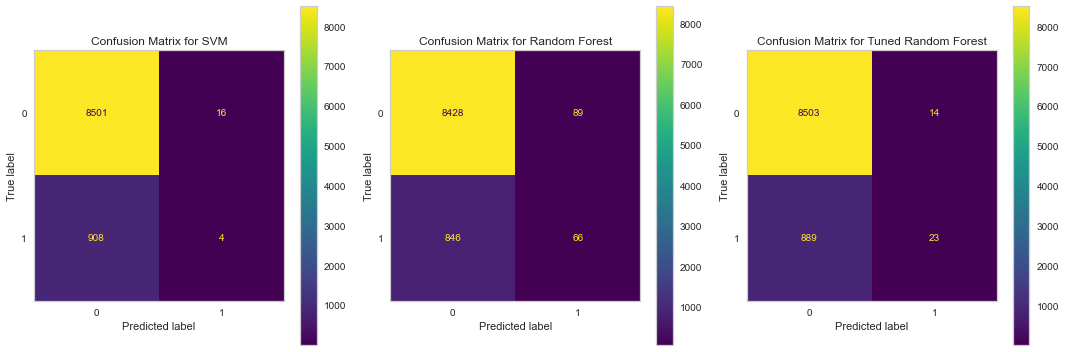

In [51]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))
print('SVM Precision:', precision_score(y_test, y_pred_svc, zero_division=0))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, zero_division=0))
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division=0))

dcm_svc.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].grid(linewidth= 0)

dcm_rf.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].grid(linewidth= 0)

dcm_tuned_rf.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned Random Forest')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

AdaBoost Precision: 0.5232558139534884
Tuned AdaBoost Precision: 0.5263157894736842
GradientBoosting Precision: 0.55


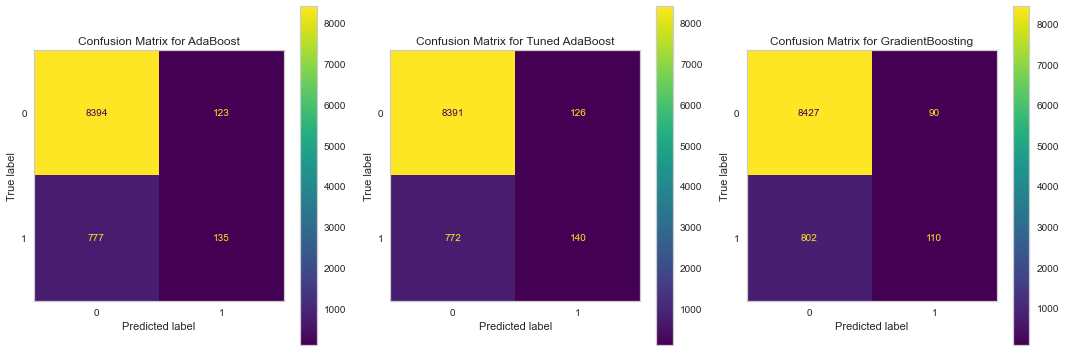

In [52]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('AdaBoost Precision:', precision_score(y_test, y_pred_ada, zero_division=0))
print('Tuned AdaBoost Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division=0))
print('GradientBoosting Precision:', precision_score(y_test, y_pred_grb, zero_division=0))

dcm_ada.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for AdaBoost')
axes[0].grid(linewidth= 0)

dcm_tuned_ada.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned AdaBoost')
axes[1].grid(linewidth= 0)

dcm_grb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for GradientBoosting')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

Tuned GradientBoosting Precision: 0.55
XGB Precision: 0.4573643410852713
Tuned XGB Precision: 0.5333333333333333


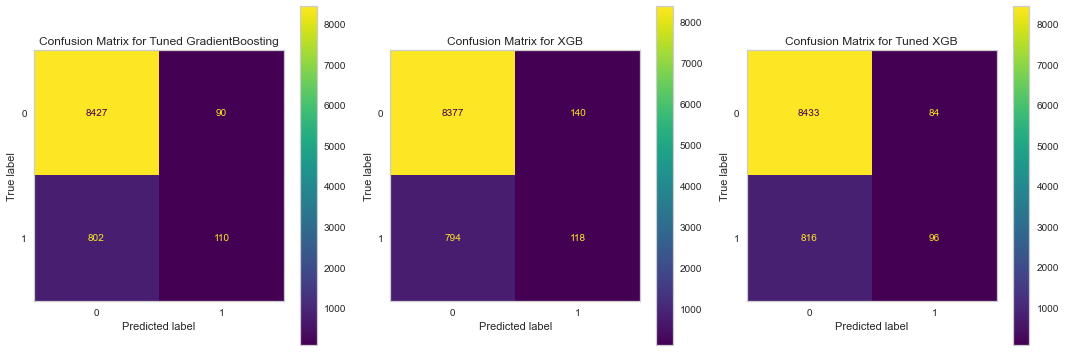

In [53]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('Tuned GradientBoosting Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division=0))
print('XGB Precision:', precision_score(y_test, y_pred_xgb, zero_division=0))
print('Tuned XGB Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division=0))

dcm_tuned_grb.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for Tuned GradientBoosting')
axes[0].grid(linewidth= 0)

dcm_xgb.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for XGB')
axes[1].grid(linewidth= 0)

dcm_tuned_xgb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned XGB')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

LGBM Precision: 0.5411764705882353
Tuned LGBM Precision: 0.0
CatBoost Precision: 0.539906103286385
Tuned CatBoost Precision: 1.0


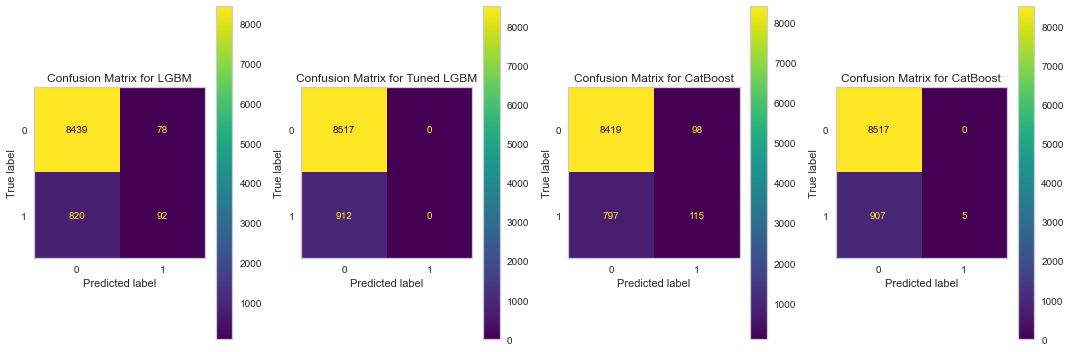

In [54]:
fig, axes= plt.subplots(1, 4, figsize= (15, 5))

print('LGBM Precision:', precision_score(y_test, y_pred_lgm, zero_division=0))
print('Tuned LGBM Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division=0))
print('CatBoost Precision:', precision_score(y_test, y_pred_cat, zero_division=0))
print('Tuned CatBoost Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division=0))

dcm_lgm.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for LGBM')
axes[0].grid(linewidth= 0)

dcm_tuned_lgm.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned LGBM')
axes[1].grid(linewidth= 0)

dcm_cat.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for CatBoost')
axes[2].grid(linewidth= 0)

dcm_tuned_cat.plot(ax= axes[3])
axes[3].set_title('Confusion Matrix for CatBoost')
axes[3].grid(linewidth= 0)

plt.tight_layout()
plt.show()